# Predicting the clusters for the Iris flowers dataset🌷🌷
#### Written By- Umang Tripathi
This notebook utilises various python's visualizing libraries like Matplotlib and machine learning libraries like sklearn, pandas to predict the clusters for the iris flowers dataset.

## 1. Problem Statement
> From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

## 2. Dataset
The Iris dataset can be accessed from the following [link](https://bit.ly/3kXTdox).

## 3. Evaluation
> The evaluation metric for this task is Silhouette Score. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).

**NOTE:** Our goal will be to maximise Silhouette Score. 

## 4. Features
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

## Importing the libraries and the dataset

In [230]:
# Import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Import utility libraries
import os
# Import modelling libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [231]:
# Importing the dataset
iris = pd.read_csv("Iris.csv", index_col=False)
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
128,129,6.4,2.8,5.6,2.1,Iris-virginica
30,31,4.8,3.1,1.6,0.2,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica


In [232]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [233]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [234]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [235]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Performing EDA on the dataset

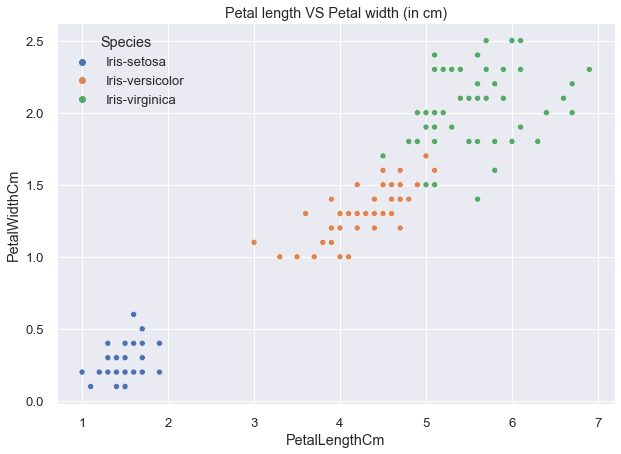

In [236]:
# Relation between petal length and petal width
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", hue="Species").set_title('Petal length VS Petal width (in cm)');

The petals of the Iris-setosa are the smallest followed by Iris-versicolor and Iris-virginica. Thus, we can easily identify Iris-setosa. There is an overlap between the length to width ratio of Iris-versicolor and Iris-virginica. So, it might be a bit difficult to identify them based on their petal size.

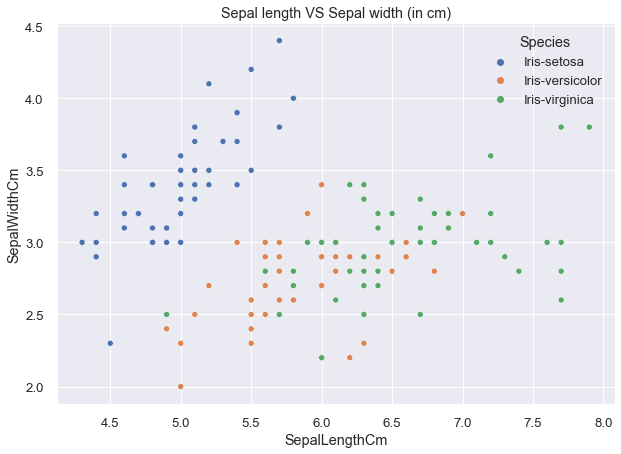

In [237]:
# Relation between Sepal length and sepal width
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species").set_title('Sepal length VS Sepal width (in cm)');

C:\Users\umang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\umang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\umang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

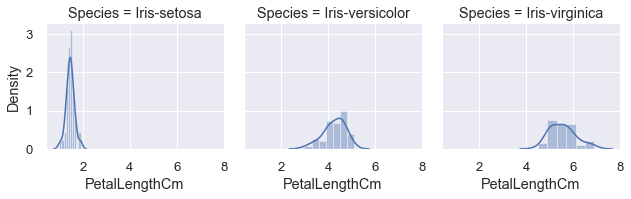

In [238]:
# Relation between different Species and their Petal Lengths
ax = sns.FacetGrid(col='Species',data=iris,legend_out=False)
ax.map(sns.distplot,'PetalLengthCm');

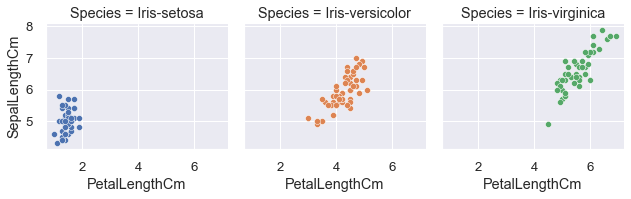

In [239]:
# Relation between different species's petal length and sepal length
ax = sns.FacetGrid(col='Species',data=iris,legend_out=False, hue='Species')
ax.map(sns.scatterplot,'PetalLengthCm', 'SepalLengthCm');

## Data Manipulation
Since the Species and the Id columns are redundant, we'll remove them from the main dataset.

In [241]:
# Encoding the species feature with numbers
df = iris.drop(['Id', 'Species'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\Users\umang\AppData\Local\Temp/ipykernel_3828/4187508550.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.loc[:, df.columns != 'Id'].hist(ax=ax, layout=(1, 4));


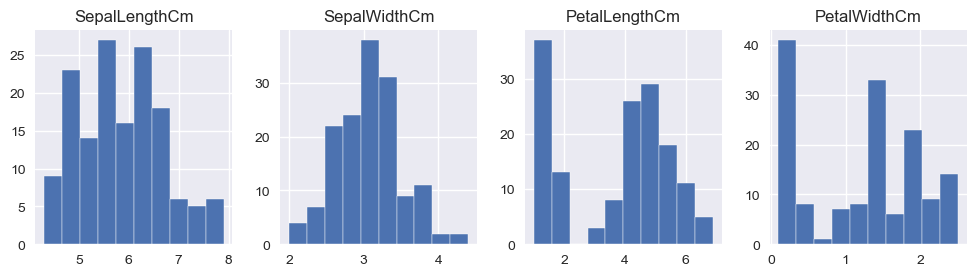

In [245]:
# Graphical representation of the distribution of each column of dataset
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(10, 3), dpi=100)

df.loc[:, df.columns != 'Id'].hist(ax=ax, layout=(1, 4));
plt.tight_layout();

## Data Modelling and fitting

C:\Users\umang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


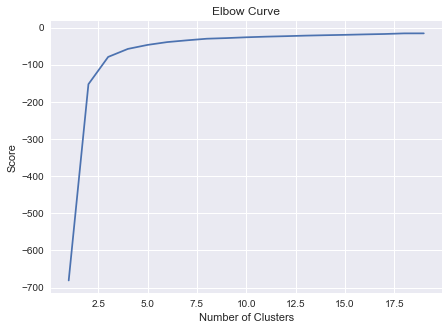

In [315]:
# Get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
# Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.figure(figsize=(7, 5))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

As we see 3 is optimal number of cluster where score has become constant. so fit and check cluster on 3 class cluster.

In [271]:
# Initialize the model
kmeans = KMeans(n_init=50, max_iter=500, random_state=42, n_clusters=3)
# Fit the model and make prediction
y_pred = kmeans.fit_predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [272]:
# The lowest SSE value, centroid of the clusters and the iterations required to converge
centers = kmeans.cluster_centers_
kmeans.inertia_, kmeans.cluster_centers_, kmeans.n_iter_

(78.94084142614601,
 array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.418     , 1.464     , 0.244     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 3)

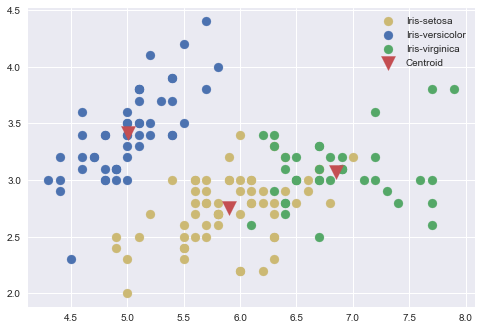

In [305]:
# Visualizing the clusters
plt.scatter(df.iloc[y_pred == 0, 0], df.iloc[y_pred == 0, 1], s=80, c='y', label='Iris-setosa')
plt.scatter(df.iloc[y_pred == 1, 0], df.iloc[y_pred == 1, 1], s=80, c='b', label='Iris-versicolor')
plt.scatter(df.iloc[y_pred == 2, 0], df.iloc[y_pred == 2, 1], s=80, c='g', label='Iris-virginica')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, label='Centroid', marker='v')
plt.legend();

In [311]:
# Silhouette score
silhouette_score(df, kmeans.labels_)

0.5525919445499757